## Problem Statement:

Build a model to accurately predict whether the patients in the dataset have diabetes or not.
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


# Importing required packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
warnings.filterwarnings("ignore")

# Data Exploration:

In [4]:
health_df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv', header=0)
health_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
health_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


There are 9 variables in this dataset. Outcome is our target/ dependent variable. All are numeric variables. Outcome is a categorical variable and can have value either 0 or 1. It can be seen that there is no NaN value for any of the variables.

But we can see Glucose, BloodPressure, SkinThickness, Insulin, BMI Features have minimum value 0. That does not make any sense. We will check each feature one by one.

## Visually explore these variables using histograms and treayting missing values

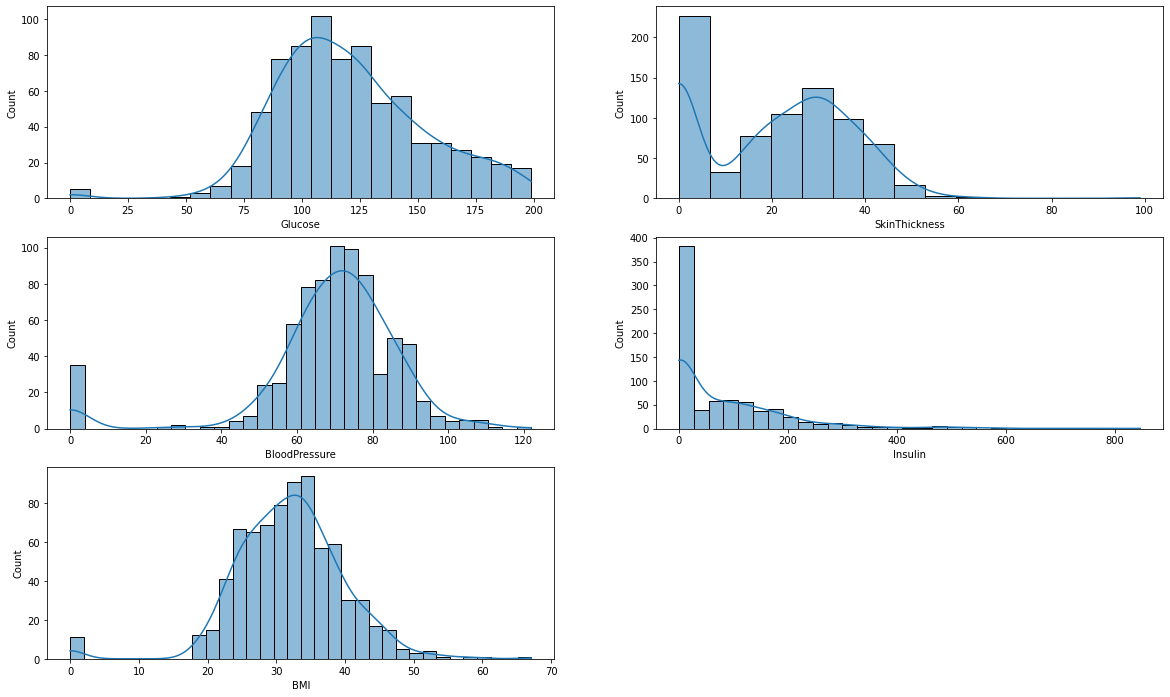

In [7]:
plt.figure(figsize=[20,12])
ax1 = plt.subplot(3,2,1)
ax2 = plt.subplot(3,2,2)
ax3 = plt.subplot(3,2,3)
ax4 = plt.subplot(3,2,4)
ax5 = plt.subplot(3,2,5)
sns.histplot(data= health_df, x='Glucose', kde=True, ax=ax1)
sns.histplot(data= health_df, x='SkinThickness', kde=True, ax=ax2)
sns.histplot(data= health_df, x='BloodPressure', kde=True, ax=ax3)
sns.histplot(data= health_df, x='Insulin', kde=True, ax=ax4)
sns.histplot(data= health_df, x='BMI', kde=True, ax=ax5)
plt.show()

We can see Glucose, BMI, BloodPressure have few number of 0 value, where SkinThickness and Insulin have very higher number of 0 values.

### Calculating percentage of missing values in these features

In [8]:
#replacing 0 with NaN for Glucose, BMI, BloodPressure

health_df.replace({'Glucose': 0, 'BloodPressure': 0, 'BMI': 0, 'SkinThickness' : 0, 'Insulin' : 0}, np.nan, inplace=True)

In [9]:
#percentage of missing value

health_df.isna().sum() * 100 / health_df.shape[0]

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

It can be seens that BloodPressure has almost normal distribution if missing values are ignored, so hear mean imputation should be ok. BMI and Glucose, SkinThickness have bit skewness, so median imputation can be used.

For Insulin, percentage of missing value is very high (48.7%). I'll go with median imputation. I'll build my predictive models in two different ways.

##### Approach 1: Including SkinThickness and Insulin in our model.

##### Approach 2: Another approach is, building models after excluding Insulin.

In [10]:
health_df['BloodPressure'].fillna(health_df['BloodPressure'].mean(), inplace = True)
health_df['Glucose'].fillna(health_df['Glucose'].median(), inplace = True)
health_df['BMI'].fillna(health_df['BMI'].median(), inplace = True)
health_df['SkinThickness'].fillna(health_df['SkinThickness'].median(), inplace = True)
health_df['Insulin'].fillna(health_df['Insulin'].median(), inplace = True)

In [11]:
health_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Data types and the count of variables

There are 9 Numeric variables, aot of that 3 are intiger and 6 are of float type.

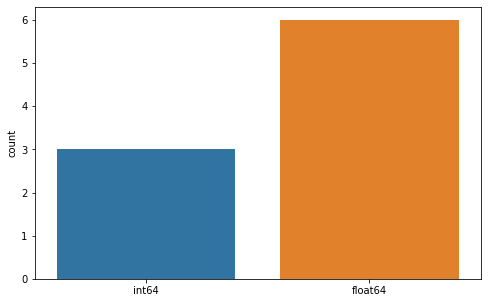

In [12]:
plt.figure(figsize=[8,5])
sns.countplot(health_df.dtypes.map(str))
plt.show()

In [13]:
health_df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

It can be seen that our dataset has imbalanced class. We have 500 observations of claas 0 and 268 observations for Class 1. So there is a moderate imbalance in data with 35% data in minority class (1) and 65% in majority class (0).

### Scatter charts between the pair of variables

<Figure size 1080x576 with 0 Axes>

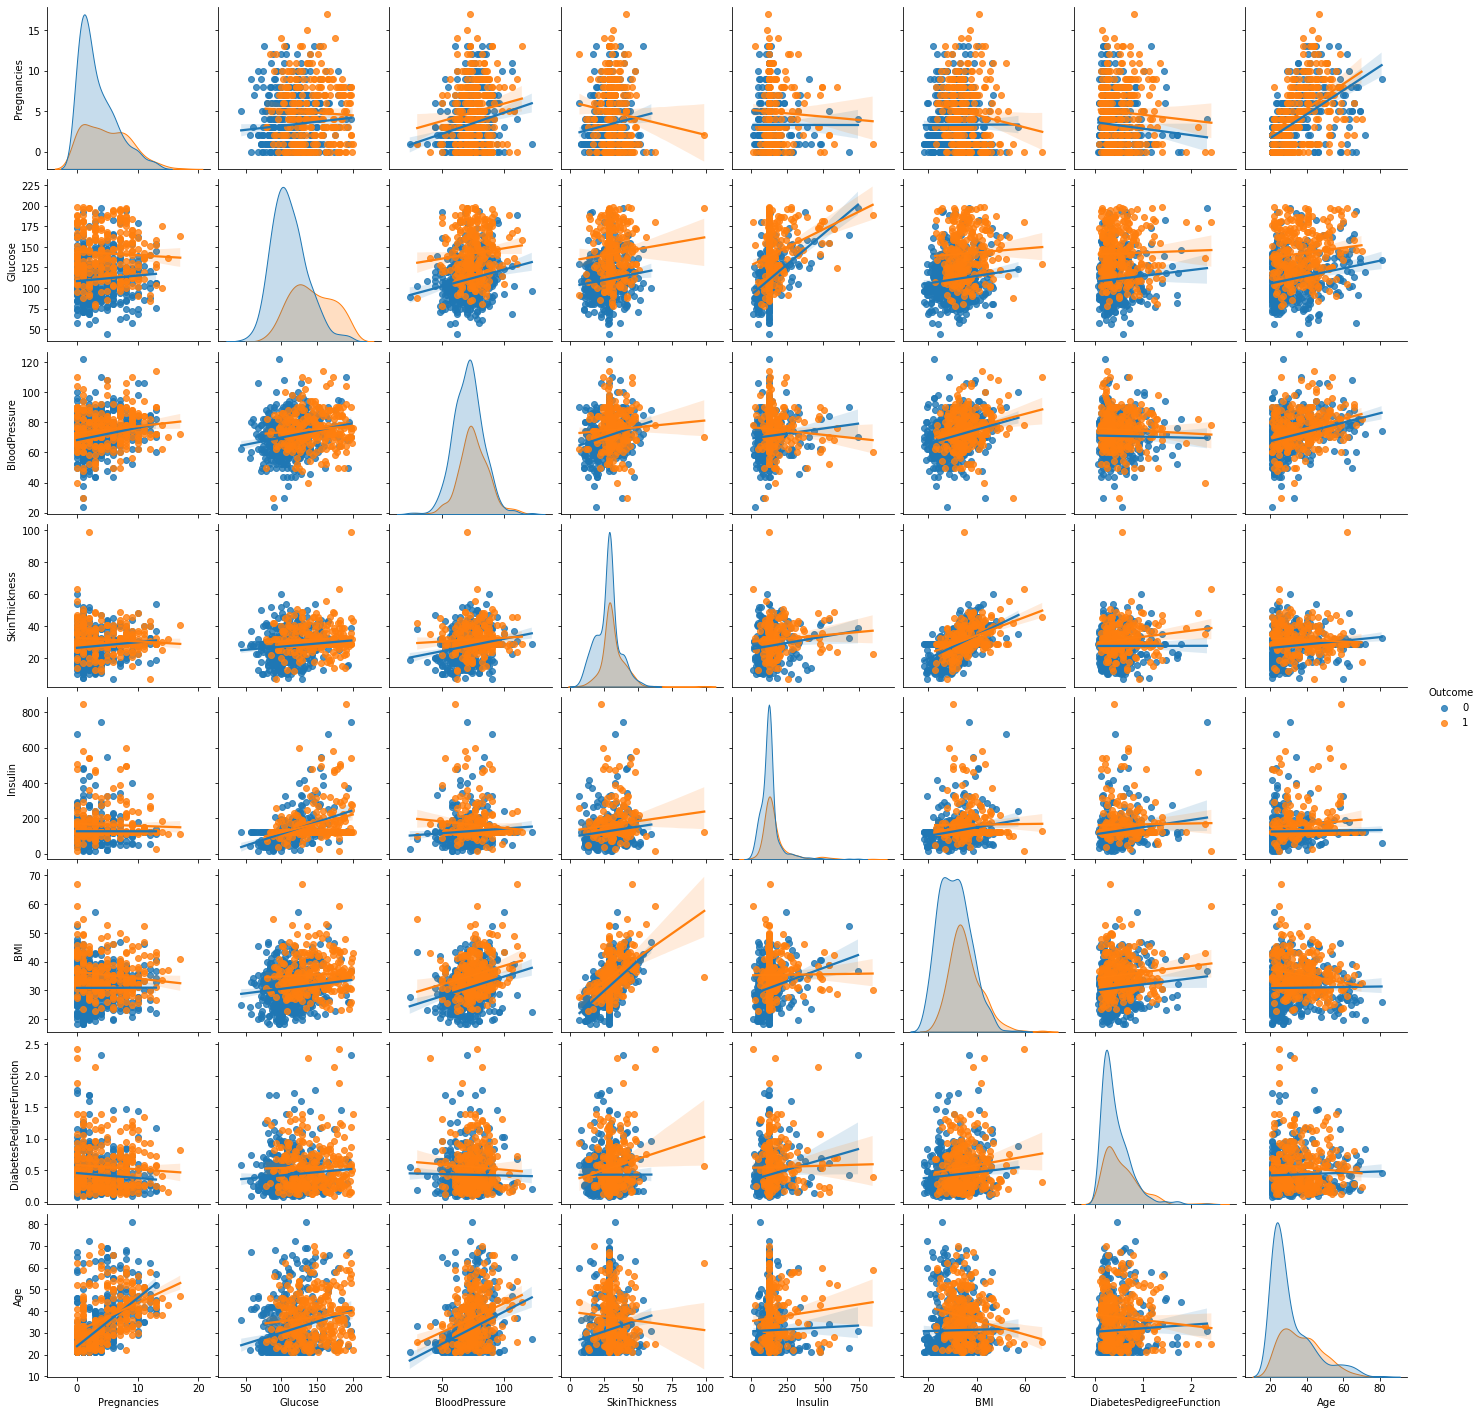

In [14]:
plt.figure(figsize=[15,8])
sns.pairplot(data=health_df, kind='reg', hue='Outcome')
plt.show()

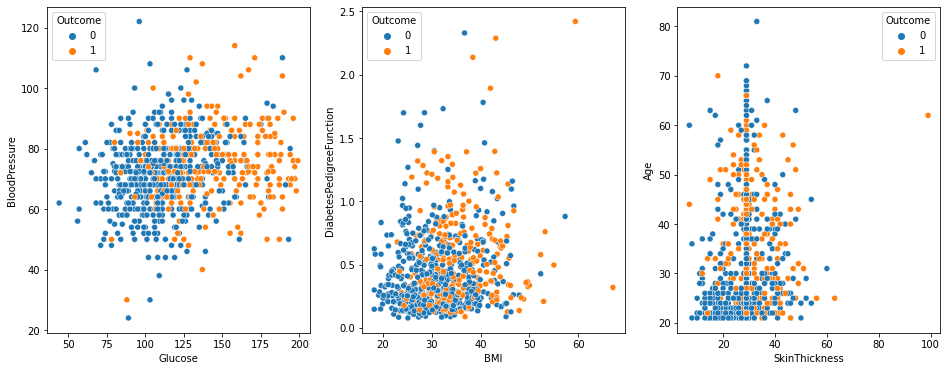

In [15]:
#Checking below features in more details

plt.figure(figsize=[16,6])
plt.subplot(1,3,1)
sns.scatterplot(data= health_df, x= 'Glucose', y='BloodPressure', hue='Outcome')
plt.subplot(1,3,2)
sns.scatterplot(data= health_df, x= 'BMI', y='DiabetesPedigreeFunction', hue='Outcome')
plt.subplot(1,3,3)
sns.scatterplot(data= health_df, x= 'SkinThickness', y='Age', hue='Outcome')
plt.show()

It can be seen taht there is somewhat positive linear relation between Insulin and Glucose. Same with Age and Pregnancies. If this relation is very strong or not that we can see later on using correlation heatmap.

From the scatterplots it can be seen that observations of outcome 0 and 1 are almost overplapping with each other in case of most of the features. Only For Glucose, we can see if Glucose is below 90 then there is very low chance of outcome 1 and if Glucose is above 150 then there is a very high chance of outcome to be 1.

Again if BMI is below 25 then there is almost no observation having outcome =1 where if BMI is more than 25 then we can see both 0 and 1 in outcome.

Also it can be seen that the probablity of outcome =1 when age<25 is lesser than the when age > 25.

### Correlation Analysis

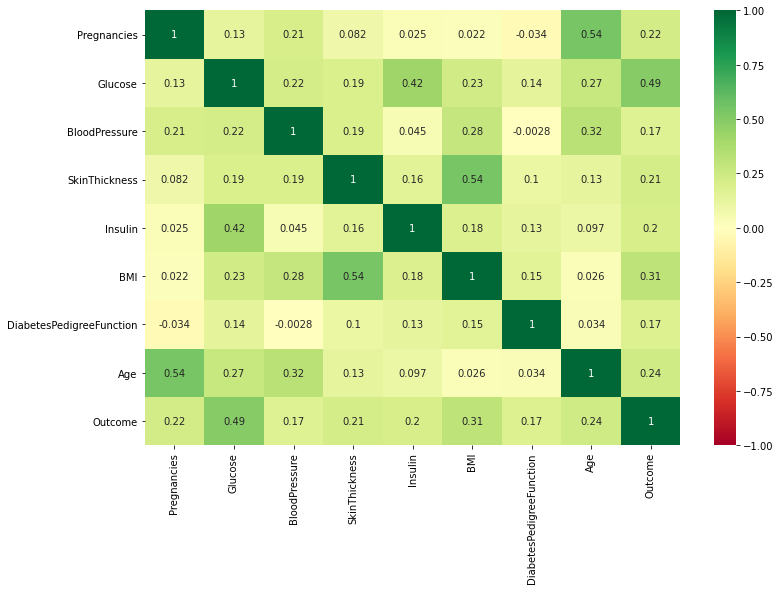

In [16]:
plt.figure(figsize=[12,8])
sns.heatmap(health_df.corr(), annot=True, cmap='RdYlGn', vmin=-1, vmax=1, center= 0)
plt.show()

We can see that there is no very strong linear relations between any of the variables. There are medium linear relations between Age and Number of Pregnancies, BMI and SkinThickness, Insulin and Glucose.

# Data Modeling:

## Approach 1 :

In [17]:
label= health_df.iloc[:,-1]
label

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [18]:
data= health_df.iloc[:,:-1]
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47


In [19]:
ss= StandardScaler()
data_scaled= pd.DataFrame(ss.fit_transform(data))
data_scaled.head()

,0,1,2,3,4,5,6,7
0,0.639947,0.866045,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


## Finding the best performing model
1. Logistic Regression
2. Support Vector Classifier
3. K Neighbors Classifier
4. Decision Tree Classifier
5. Random Forest Classifier
6. XGBoost Classifier

In [20]:
# Using StratifiedKFold for cross validation to find best performing model

kf= StratifiedKFold(n_splits= 7, random_state=None)

In [21]:
# Testing with 6 Models

lr= LogisticRegression(solver='liblinear') # as dataset is small
svc= SVC()
knn= KNeighborsClassifier()
dt= DecisionTreeClassifier()
rf= RandomForestClassifier()
xgb= XGBClassifier()

In [22]:
lr_accuracy= []
svc_accuracy= []
knn_accuracy= []
dt_accuracy= []
rf_accuracy= []
xgb_accuracy= []

In [23]:
for train_idx, test_idx in kf.split(data,label):
    X_train, X_test= data_scaled.iloc[train_idx,:], data_scaled.iloc[test_idx,:]
    y_train, y_test= label[train_idx], label[test_idx]
    
    # Logistic Regression
    lr.fit(X_train, y_train)
    lr_prediction= lr.predict(X_test)
    lr_acc= accuracy_score(lr_prediction, y_test)
    lr_accuracy.append(lr_acc)
    
    # SVC
    svc.fit(X_train, y_train)
    svc_prediction= svc.predict(X_test)
    svc_acc= accuracy_score(svc_prediction, y_test)
    svc_accuracy.append(svc_acc)
    
    # KNN
    knn.fit(X_train, y_train)
    knn_prediction= knn.predict(X_test)
    knn_acc= accuracy_score(knn_prediction, y_test)
    knn_accuracy.append(knn_acc)
    
    # Decision Tree
    dt.fit(X_train, y_train)
    dt_prediction= dt.predict(X_test)
    dt_acc= accuracy_score(dt_prediction, y_test)
    dt_accuracy.append(dt_acc)
    
    # Random Forest
    rf.fit(X_train, y_train)
    rf_prediction= rf.predict(X_test)
    rf_acc= accuracy_score(rf_prediction, y_test)
    rf_accuracy.append(rf_acc)
    
    # XGB Classifier
    xgb.fit(X_train, y_train)
    xgb_prediction= xgb.predict(X_test)
    xgb_acc= accuracy_score(xgb_prediction, y_test)
    xgb_accuracy.append(xgb_acc)

[00:12:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:12:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [24]:
print('Logistic Regression- Accuracy of each fold:',*lr_accuracy)
print('Average accuracy of Logistic Regression: ', np.mean(lr_accuracy))
print('Standard deviation of accuracy:', np.std(lr_accuracy))
print('='*50)
print('SVC- Accuracy of each fold:',*svc_accuracy)
print('Average accuracy of SVC: ', np.mean(svc_accuracy))
print('Standard deviation of accuracy:', np.std(svc_accuracy))
print('='*50)
print('KNN- Accuracy of each fold:',*knn_accuracy)
print('Average accuracy of KNN: ', np.mean(knn_accuracy))
print('Standard deviation of accuracy:', np.std(knn_accuracy))
print('='*50)
print('Decision Tree- Accuracy of each fold:',*dt_accuracy)
print('Average accuracy of Decision Tree: ', np.mean(dt_accuracy))
print('Standard deviation of accuracy:', np.std(dt_accuracy))
print('='*50)
print('Random Forest- Accuracy of each fold:',*rf_accuracy)
print('Average accuracy of Random Forest: ', np.mean(rf_accuracy))
print('Standard deviation of accuracy:', np.std(rf_accuracy))
print('='*50)
print('XGB Classifier- Accuracy of each fold:',*xgb_accuracy)
print('Average accuracy of XGB Classifier: ', np.mean(xgb_accuracy))
print('Standard deviation of accuracy:', np.std(xgb_accuracy))

Logistic Regression- Accuracy of each fold: 0.7454545454545455 0.7909090909090909 0.7090909090909091 0.8 0.7727272727272727 0.8073394495412844 0.7798165137614679
Average accuracy of Logistic Regression:  0.7721911116406529
Standard deviation of accuracy: 0.03187927324030685
SVC- Accuracy of each fold: 0.7181818181818181 0.8272727272727273 0.6636363636363637 0.7818181818181819 0.7454545454545455 0.7981651376146789 0.7614678899082569
Average accuracy of SVC:  0.756570951983796
Standard deviation of accuracy: 0.05017733939616514
KNN- Accuracy of each fold: 0.7181818181818181 0.7636363636363637 0.6909090909090909 0.7818181818181819 0.7272727272727273 0.7614678899082569 0.6972477064220184
Average accuracy of KNN:  0.7343619683069225
Standard deviation of accuracy: 0.0325609077499656
Decision Tree- Accuracy of each fold: 0.6090909090909091 0.6727272727272727 0.5818181818181818 0.6636363636363637 0.7454545454545455 0.8165137614678899 0.7614678899082569
Average accuracy of Decision Tree:  0.69

## Hyperparameters Tunning and Comparing best 2 models with KNN

In [25]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(data_scaled, label, test_size= 0.2, stratify= label, random_state= 42)

### 1. Logistic Regression

In [26]:
log_reg = LogisticRegression(solver='liblinear')
param_grid= {"C": np.logspace(-5,5,22), "penalty": ["l1","l2"]}
log_reg_grid = GridSearchCV(log_reg, param_grid= param_grid, cv= 25, verbose= True, n_jobs= -1)
log_reg_grid.fit(X_train, y_train)

Fitting 25 folds for each of 44 candidates, totalling 1100 fits


GridSearchCV(cv=25, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': array([1.00000000e-05, 2.99357729e-05, 8.96150502e-05, 2.68269580e-04,
       8.03085722e-04, 2.40409918e-03, 7.19685673e-03, 2.15443469e-02,
       6.44946677e-02, 1.93069773e-01, 5.77969288e-01, 1.73019574e+00,
       5.17947468e+00, 1.55051578e+01, 4.64158883e+01, 1.38949549e+02,
       4.15956216e+02, 1.24519708e+03, 3.72759372e+03, 1.11588399e+04,
       3.34048498e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']},
             verbose=True)

In [27]:
# Checking the best score on train data

print(log_reg_grid.best_score_)
print(log_reg_grid.best_params_)

0.7854000000000001
{'C': 1.7301957388458944, 'penalty': 'l1'}


In [28]:
# Testing on test data
log_reg_opt = LogisticRegression(solver='liblinear', C= 1.7301957388458944, penalty= 'l1')
log_reg_opt.fit(X_train, y_train)
log_reg_opt.score(X_test, y_test)

0.7012987012987013

In [29]:
y_pred= log_reg_opt.predict(X_test)

In [30]:
#Confusion Matrix

tn, fp, fn, tp= confusion_matrix(y_test, y_pred).ravel()

print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)

True Negative: 81
False Positive: 19
False Negative: 27
True Positive: 27


In [31]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



Overall Accuracy of the model is : .70

Fraction of positives that were correctly identified (Recall) for class 0 is good, .81. But for class 1 the recall value is not that good. Recall for class 1 = TP/(TP+FN) = 27/(27+27) = .5

Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. Precision For class 1: TP/(TP + FP) = 27/(27+19) = .59 For class 0 it's .75

F1 score can be calculated as: 2 (precision recall) / (precision + recall). F1 score of class 0 is .78 and for class 1 is .54

#### Receiver Operating Characteristics Curve

AUC: 0.843


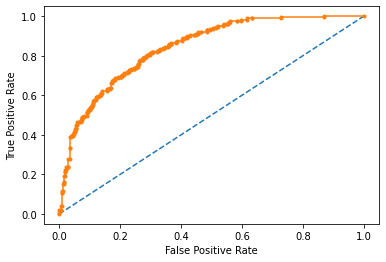

In [32]:
predict_pr = log_reg_opt.predict_proba(data_scaled)
predict_pr = predict_pr[:, 1]
auc = roc_auc_score(label, predict_pr)
print('AUC:', round(auc, 4))
fpr, tpr, thresholds = roc_curve(label, predict_pr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### 2. Random Forest Classifier

In [33]:
rf_model= RandomForestClassifier()

param_grid= {'n_estimators': list(range(20,41,1)),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [3,4,5,6,7,8],
    'criterion': ['gini', 'entropy']}

rf_grid= GridSearchCV(rf_model, param_grid= param_grid, cv= 25, verbose= True, n_jobs= -1)
rf_grid.fit(X_train, y_train)

Fitting 25 folds for each of 756 candidates, totalling 18900 fits


GridSearchCV(cv=25, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [20, 21, 22, 23, 24, 25, 26, 27, 28,
                                          29, 30, 31, 32, 33, 34, 35, 36, 37,
                                          38, 39, 40]},
             verbose=True)

In [34]:
# Checking the best score on train data

print(rf_grid.best_score_)
#print(rf_grid.best_params_)

0.7900666666666667


In [35]:
rf_model_opt= RandomForestClassifier(criterion= 'gini', max_depth= 6, max_features= 'auto', n_estimators= 32)
rf_model_opt.fit(X_train, y_train)
rf_model_opt.score(X_test, y_test)

0.7597402597402597

In [36]:
y_pred= rf_model_opt.predict(X_test)

In [37]:
#Confusion Matrix

tn, fp, fn, tp= confusion_matrix(y_test, y_pred).ravel()

print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)

True Negative: 85
False Positive: 15
False Negative: 22
True Positive: 32


In [38]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



In [39]:
probs = rf_model_opt.predict_proba(data_scaled)
probs 

array([[0.37959173, 0.62040827],
       [0.90758927, 0.09241073],
       [0.27856141, 0.72143859],
       ...,
       [0.93690029, 0.06309971],
       [0.51193771, 0.48806229],
       [0.86355544, 0.13644456]])

#### ROC Curve

AUC: 0.9331


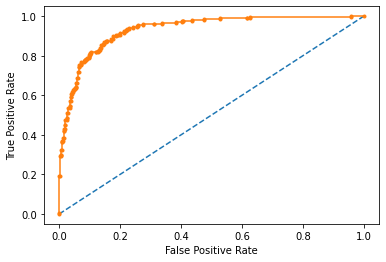

In [40]:
predict_pr = rf_model_opt.predict_proba(data_scaled)
predict_pr = predict_pr[:, 1]
auc = roc_auc_score(label, predict_pr)
print('AUC:', round(auc, 4))
fpr, tpr, thresholds = roc_curve(label, predict_pr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### 3. KNN

In [41]:
knn_model= KNeighborsClassifier()
param_grid= {'n_neighbors': list(range(1,20)), 'weights': ["uniform", "distance"], 'metric': ['minkowski','manhattan','euclidean']}
knn_grid= GridSearchCV(knn_model, param_grid= param_grid, cv= 25, verbose= True, n_jobs= -1)
knn_grid.fit(X_train, y_train)

Fitting 25 folds for each of 114 candidates, totalling 2850 fits


GridSearchCV(cv=25, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [42]:
# Checking the best score on train data

print(knn_grid.best_score_)
print(knn_grid.best_params_)

0.7804000000000001
{'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'uniform'}


In [43]:
# Testing on test data

knn_opt = KNeighborsClassifier(n_neighbors= 15, weights= 'uniform', metric= 'minkowski')
knn_opt.fit(X_train, y_train)
knn_opt.score(X_test, y_test)

0.7337662337662337

In [44]:
y_pred= knn_opt.predict(X_test)

In [45]:
#Confusion Matrix

tn, fp, fn, tp= confusion_matrix(y_test, y_pred).ravel()

print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)

True Negative: 85
False Positive: 15
False Negative: 26
True Positive: 28


In [46]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       100
           1       0.65      0.52      0.58        54

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.73      0.73      0.73       154



#### ROC Curve

AUC: 0.8651


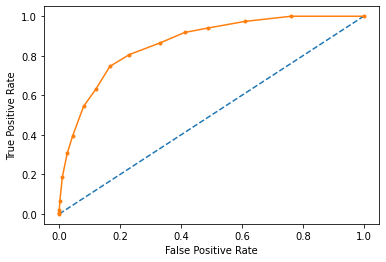

In [47]:
predict_pr = knn_opt.predict_proba(data_scaled)
predict_pr = predict_pr[:, 1]
auc = roc_auc_score(label, predict_pr)
print('AUC:', round(auc, 4))
fpr, tpr, thresholds = roc_curve(label, predict_pr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

## Approach 2: (Droping Insulin and checking model performance)

In [48]:
data_ap2 = data.drop('Insulin', axis=1)
data_ap2

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,33.6,0.627,50
1,1,85.0,66.0,29.0,26.6,0.351,31
2,8,183.0,64.0,29.0,23.3,0.672,32
3,1,89.0,66.0,23.0,28.1,0.167,21
4,0,137.0,40.0,35.0,43.1,2.288,33
...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,32.9,0.171,63
764,2,122.0,70.0,27.0,36.8,0.340,27
765,5,121.0,72.0,23.0,26.2,0.245,30
766,1,126.0,60.0,29.0,30.1,0.349,47


In [49]:
ss1= StandardScaler()
data_ap2_scaled= pd.DataFrame(ss1.fit_transform(data))
data_ap2_scaled.head()

,0,1,2,3,4,5,6,7
0,0.639947,0.866045,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [50]:
X_train, X_test, y_train, y_test = train_test_split(data_ap2_scaled, label, test_size= 0.2, stratify= label, random_state= 42)

### 1. Random Forest Classifier

In [51]:
rf_model= RandomForestClassifier()

param_grid= {'n_estimators': list(range(20,41,1)),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [3,4,5,6,7,8],
    'criterion': ['gini', 'entropy']}

rf_grid= GridSearchCV(rf_model, param_grid= param_grid, cv= 25, verbose= True, n_jobs= -1)
rf_grid.fit(X_train, y_train)

Fitting 25 folds for each of 756 candidates, totalling 18900 fits


GridSearchCV(cv=25, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [20, 21, 22, 23, 24, 25, 26, 27, 28,
                                          29, 30, 31, 32, 33, 34, 35, 36, 37,
                                          38, 39, 40]},
             verbose=True)

In [52]:
# Checking the best score on train data

print(rf_grid.best_score_)
#print(rf_grid.best_params_)

0.7884


In [53]:
rf_model_opt2= RandomForestClassifier(criterion= 'entropy', max_depth= 4, max_features= 'auto', n_estimators= 30)
rf_model_opt2.fit(X_train, y_train)
rf_model_opt2.score(X_test, y_test)

0.7207792207792207

In [54]:
y_pred= rf_model_opt2.predict(X_test)

In [55]:
#Confusion Matrix

tn, fp, fn, tp= confusion_matrix(y_test, y_pred).ravel()

print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)

True Negative: 87
False Positive: 13
False Negative: 30
True Positive: 24


In [56]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       100
           1       0.65      0.44      0.53        54

    accuracy                           0.72       154
   macro avg       0.70      0.66      0.66       154
weighted avg       0.71      0.72      0.71       154



AUC: 0.8878


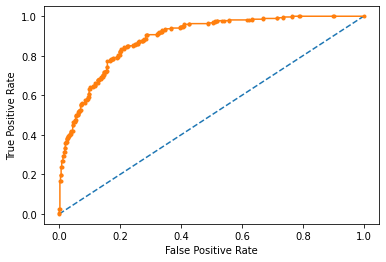

In [57]:
predict_pr = rf_model_opt2.predict_proba(data_ap2_scaled)
predict_pr = predict_pr[:, 1]
auc = roc_auc_score(label, predict_pr)
print('AUC:', round(auc, 4))
fpr, tpr, thresholds = roc_curve(label, predict_pr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

After Droping Insulin column from the feature the model is giving slighly bad performance.

### 2. KNN

In [58]:
knn_model= KNeighborsClassifier()
param_grid= {'n_neighbors': list(range(1,20)), 'weights': ["uniform", "distance"], 'metric': ['minkowski','manhattan','euclidean']}
knn_grid= GridSearchCV(knn_model, param_grid= param_grid, cv= 25, verbose= True, n_jobs= -1)
knn_grid.fit(X_train, y_train)

Fitting 25 folds for each of 114 candidates, totalling 2850 fits


GridSearchCV(cv=25, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [59]:
# Checking the best score on train data

print(knn_grid.best_score_)
print(knn_grid.best_params_)

0.7804000000000001
{'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'uniform'}


In [60]:
# Testing on test data

knn_opt2 = KNeighborsClassifier(n_neighbors= 15, weights= 'uniform', metric= 'minkowski')
knn_opt2.fit(X_train, y_train)
knn_opt2.score(X_test, y_test)

0.7337662337662337

In [61]:
y_pred= knn_opt2.predict(X_test)

In [62]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       100
           1       0.65      0.52      0.58        54

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.73      0.73      0.73       154



There is no change in classification report of KNN, whether we include or exclude Insulin feature in our model.

# Tableau Dashboard Link
https://public.tableau.com/profile/anik.chakraborty#!/vizhome/Healthcare-DiabetesAnalysis_16205897996520/Dashboard